In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from keras import metrics

In [2]:
#metaData = pd.read_csv("F:\MRI_class\data\oasis_cross_sectional.csv")
metaData = pd.read_csv("~/neuefische/alzheimer-classification/data/oasis_cross_sectional.csv")
metaData = metaData[["ID","CDR"]]

#f = lambda x: re.search('_(.+?)_', x)[1]
#metaData.ID = metaData.ID.apply(f)
#metaData = metaData[metaData.CDR.isna() == False]
metaData.CDR[metaData.CDR.isna() == True] = 0
y_train = metaData.CDR.iloc[:-80]
y_test = metaData.CDR.iloc[-80:]


In [3]:
# replace to have only 0 and 1
y_train.replace(0.5,1,inplace=True)
y_test.replace(0.5,1,inplace=True)
y_train.replace(2,1,inplace=True)
y_test.replace(2,1,inplace=True)

In [4]:
#get file names
#path = "F:\MRI_class\data\horizontal_masked"
path = "/Users/stephanbremser/neuefische/alzheimer-classification/data/horizontal_masked"#"~/neuefische/alzheimer-classification/data/horizontal_masked"
path_list = os.listdir(path)

In [5]:
#create file list matching the path_list
t = pd.DataFrame(path_list)
f = lambda x: x[0:13]
t["ID"]=t[0].apply(f)

metaData = pd.merge(metaData, t,on="ID", how="left")
metaData = metaData.rename(columns={0:"file"})

In [6]:
X = metaData["file"]
y = metaData["CDR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=10)

In [8]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [9]:
#train
#path = "F:\MRI_class\data\horizontal_masked"
#path_list = os.listdir(path)

checker = 0
for t in range(0,len(X_train.file)):
    
    #iteration check
    if t+1 > len(X_train.file)-1:
        break
    
    #image1
    temp_path = path+"/"+X_train.file[t]
    image1 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
    input_arr1 = input_arr1[:,:,:,np.newaxis]
    
    #image2
    temp_path = path+"/"+X_train.file[t+1]
    image2 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
    input_arr2 = input_arr2[:,:,:,np.newaxis]

    #concatenate
    if t == 0:
        images = np.concatenate((input_arr1,input_arr2),axis = 3)
    
    if t > 0:
        images = np.concatenate((images,input_arr2),axis = 3)

    
images = np.moveaxis(images,3,0)
images_train = images


In [10]:
#test
#path = "F:\MRI_class\data\horizontal_masked"
#path_list = os.listdir(path)

checker = 0
for t in range(0,len(X_test.file)):
    
    #iteration check
    if t+1 > len(X_test.file)-1:
        break

    #image1
    temp_path = path+"/"+X_test.file[t]
    image1 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
    input_arr1 = input_arr1[:,:,:,np.newaxis]
    
    #image2
    temp_path = path+"/"+X_test.file[t+1]
    image2 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
    input_arr2 = input_arr2[:,:,:,np.newaxis]

    #concatenate
    if t == 0:
        images = np.concatenate((input_arr1,input_arr2),axis = 3)
    
    if t > 0:
        images = np.concatenate((images,input_arr2),axis = 3)

    
images = np.moveaxis(images,3,0)
images_test = images

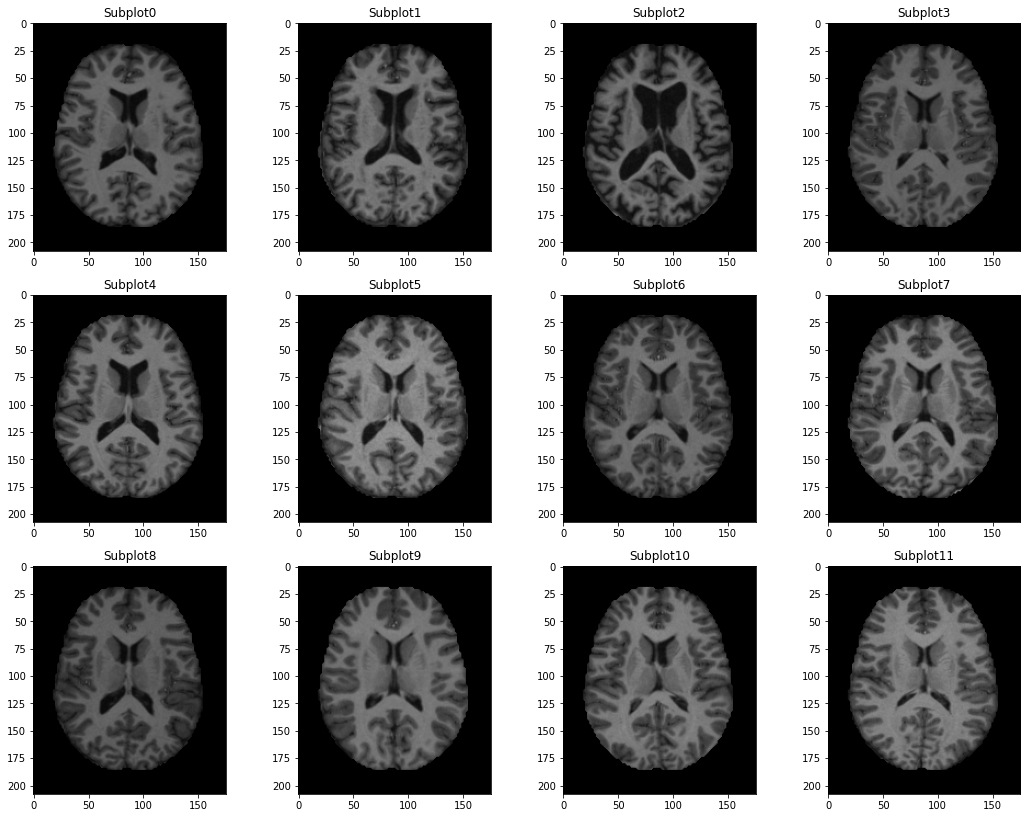

In [11]:
cols= 4
rows = 4
axes = []
width = 1000
height = 1000

fig = plt.figure(figsize=(15, 15))

for a in range(0,12):
    b = images_test[a][:][:][:].astype('uint8')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(208, 176, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-18 16:00:52.362278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-18 16:00:52.362545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 100)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 64)        36928     
                                                                 
Total params: 97,392
Trainable params: 97,392
Non-traina

In [14]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 100)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 122880)            0

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['f1_metric'])

history = model.fit(images_train, y_train, epochs=30,
                    validation_split=0.15)
                    #validation_data=(images_test, y_test))

Epoch 1/30


ValueError: in user code:

    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/metrics.py", line 4262, in get
        return deserialize(str(identifier))
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/metrics.py", line 4218, in deserialize
        return deserialize_keras_object(
    File "/Users/stephanbremser/neuefische/alzheimer-classification/python/.venv/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: f1_metric. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


4/4 - 1s - loss: 0.4636 - accuracy: 0.7706 - 1s/epoch - 298ms/step


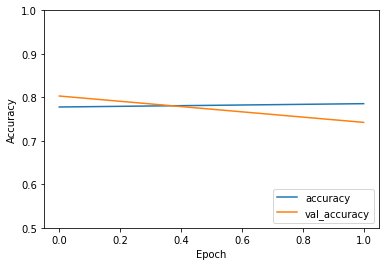

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test,  y_test, verbose=2)